In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Vasanthengineer4949/Rain-Prediction/main/weatherAUS.csv")
pd.set_option("display.max_columns",None)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#continuous numeric missing data handeling
data['MinTemp'].fillna(data['MinTemp'].mean(),axis=0,inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),axis=0,inplace=True)
data['Evaporation'].fillna(data['Evaporation'].mean(),axis=0,inplace=True)
data['Sunshine'].fillna(data['Sunshine'].mean(),axis=0,inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),axis=0,inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),axis=0,inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),axis=0,inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),axis=0,inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),axis=0,inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),axis=0,inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),axis=0,inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),axis=0,inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),axis=0,inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),axis=0,inplace=True)

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
#descrite numeric data
data['Cloud9am'].fillna(data['Cloud9am'].median(),axis=0,inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].median(),axis=0,inplace=True)

In [7]:
np.sum(data.isnull())

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}

In [9]:
data['WindGustDir']=data['WindGustDir'].map(windgustdir)
data['WindDir3pm']=data['WindDir3pm'].map(winddir3pm)
data['WindDir9am']=data['WindDir9am'].map(winddir9am)

In [10]:
data['WindGustDir'].fillna(data['WindGustDir'].median(),axis=0,inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].median(),axis=0,inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].median(),axis=0,inplace=True)

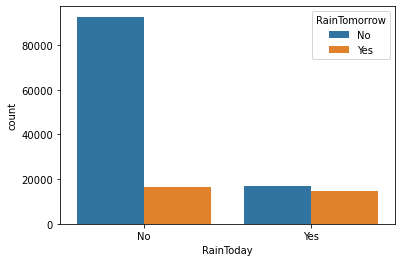

In [11]:
sns.countplot(data['RainToday'],hue=data['RainTomorrow'])

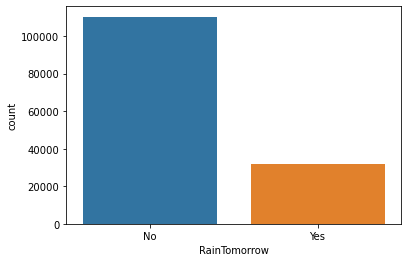

In [12]:
sns.countplot(data['RainTomorrow'])

In [13]:
data['RainToday']=pd.get_dummies(data['RainToday'],drop_first=True)
data['RainTomorrow']=pd.get_dummies(data['RainTomorrow'],drop_first=True)

In [14]:
np.sum(data.isnull())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
numerical_features=[features for features in data.columns if data[features].dtype!='O' ]
discrete_numeric=[features for features in numerical_features if len(data[features].unique())<25]
continuousnumeric=[features for features in numerical_features if features not in discrete_numeric]
categoricalvalues=[features for features in data.columns if features not in numerical_features]

In [16]:
print(numerical_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [17]:
print("numericfeatures {}".format(len(numerical_features)))
print("discrite{} ".format(len(discrete_numeric)))
print("continuousnumeric {}".format(len(continuousnumeric)))
print("categorical {} ".format(len(categoricalvalues)))

numericfeatures 21
discrite7 
continuousnumeric 14
categorical 2 


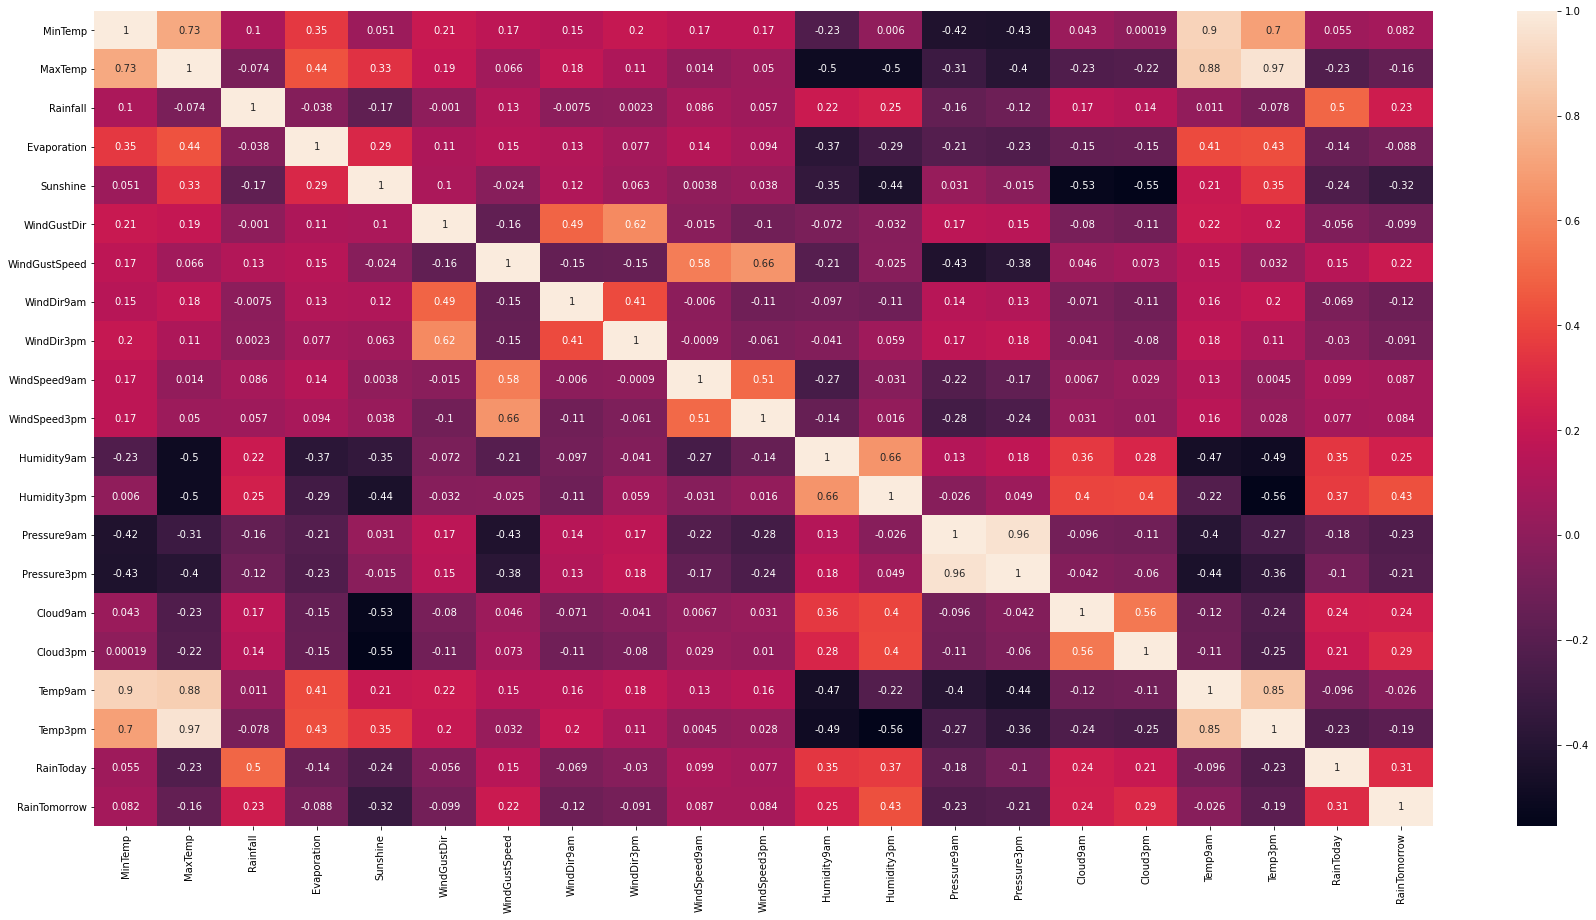

In [18]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)

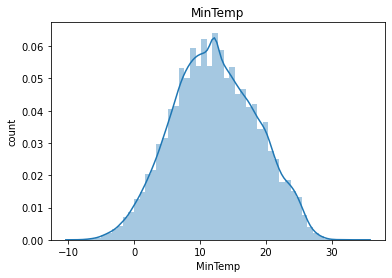

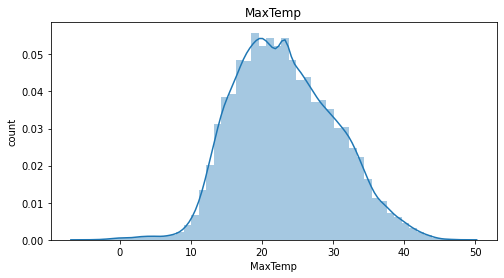

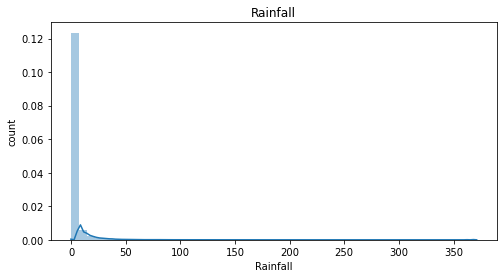

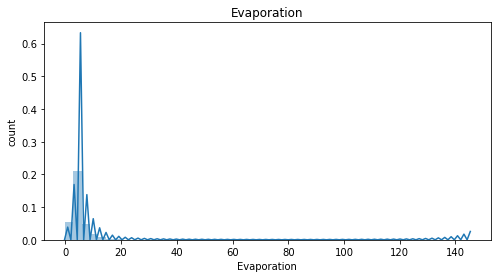

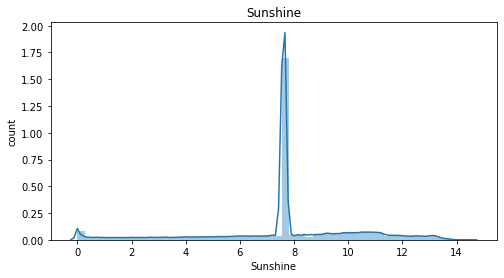

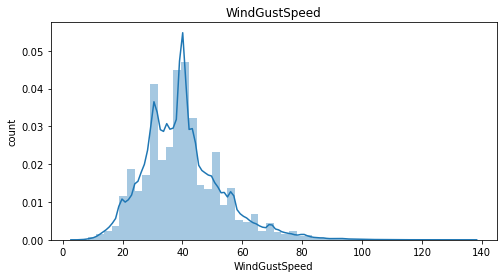

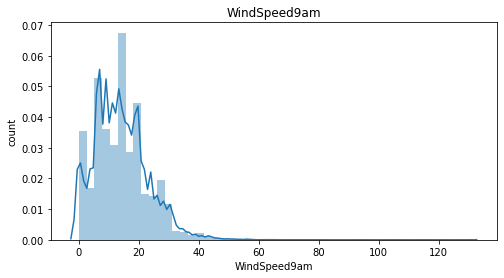

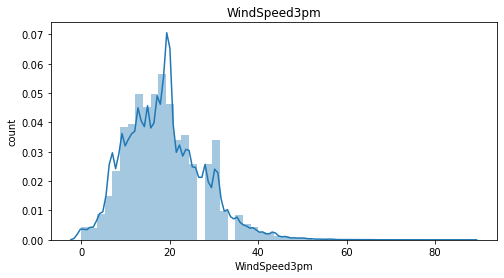

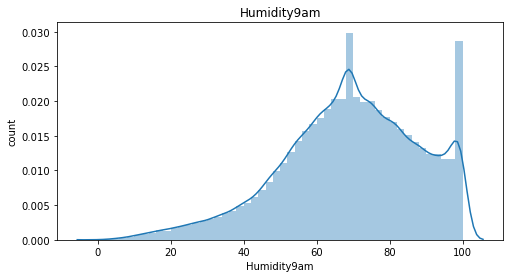

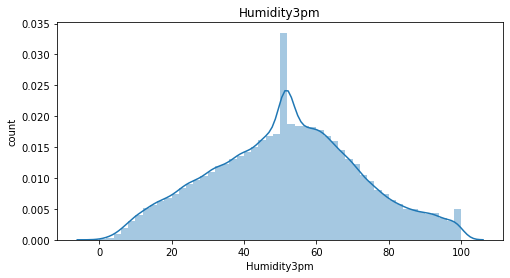

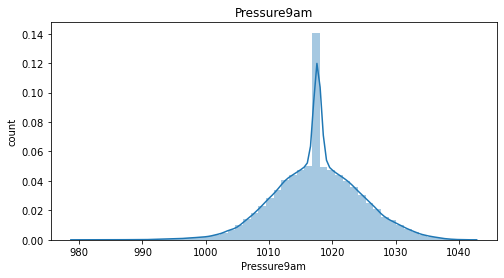

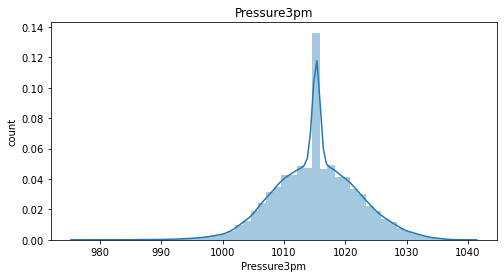

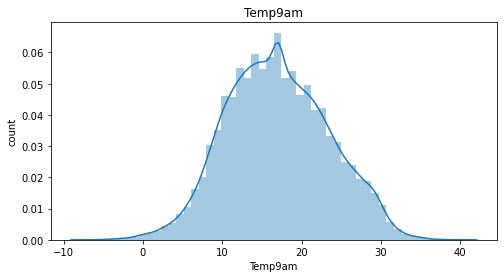

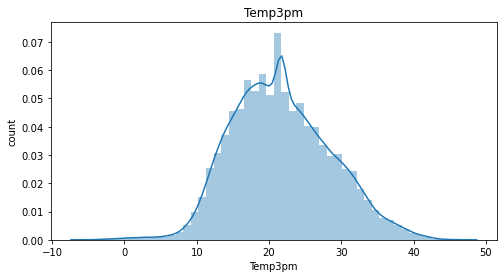

<Figure size 576x288 with 0 Axes>

In [19]:
for feature in continuousnumeric:
    sns.distplot(data[feature])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()
    plt.figure(figsize=(8,4))
    

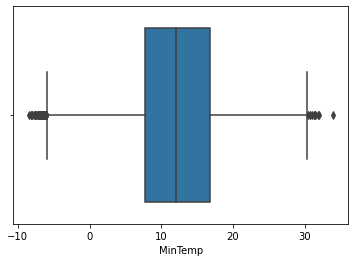

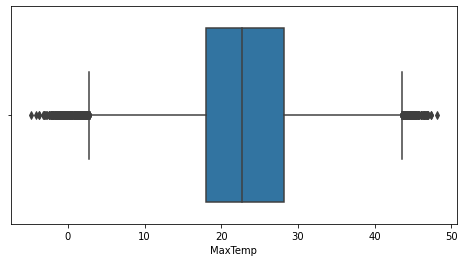

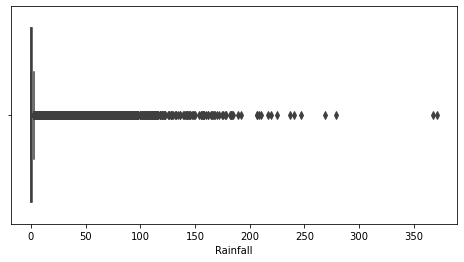

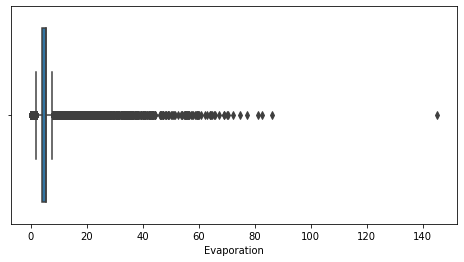

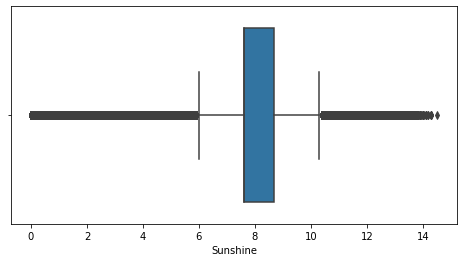

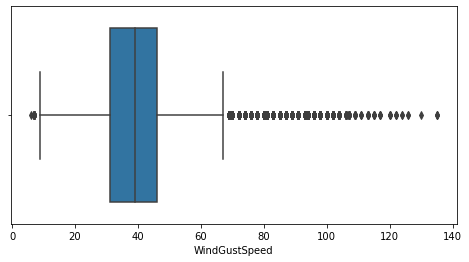

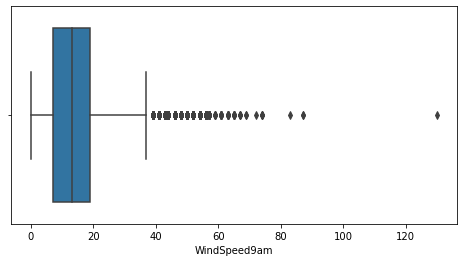

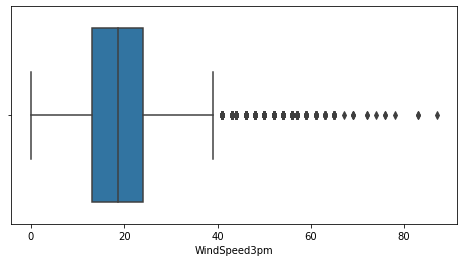

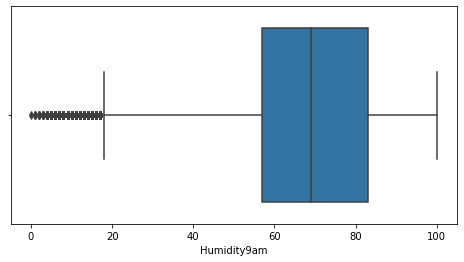

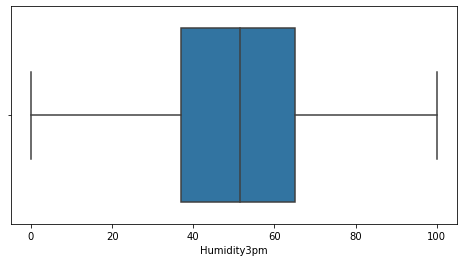

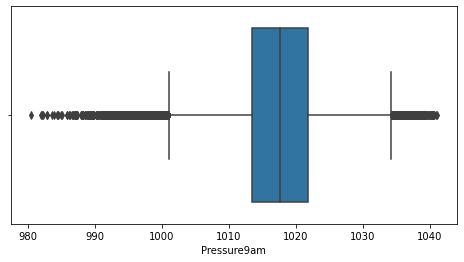

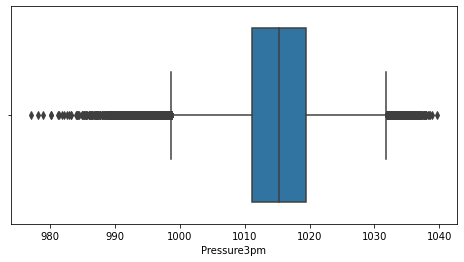

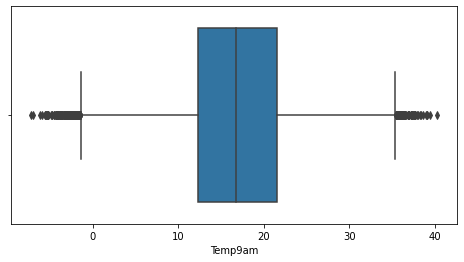

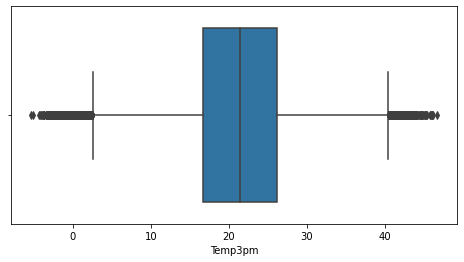

<Figure size 576x288 with 0 Axes>

In [20]:
for feature in continuousnumeric:
    sns.boxplot(data[feature])
    plt.show()
    plt.figure(figsize=(8,4))

In [21]:
data['Date']=pd.to_datetime(data['Date'],format='%Y/%m/%d',errors='coerce')

In [22]:
data1=data.groupby(['Location'])['RainTomorrow'].value_counts().sort_values(ascending=True).unstack()

In [23]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}

In [24]:
data['Location']=data['Location'].map(location)

In [25]:
data['day_month']=data['Date'].dt.month
data['day_day']=data['Date'].dt.day

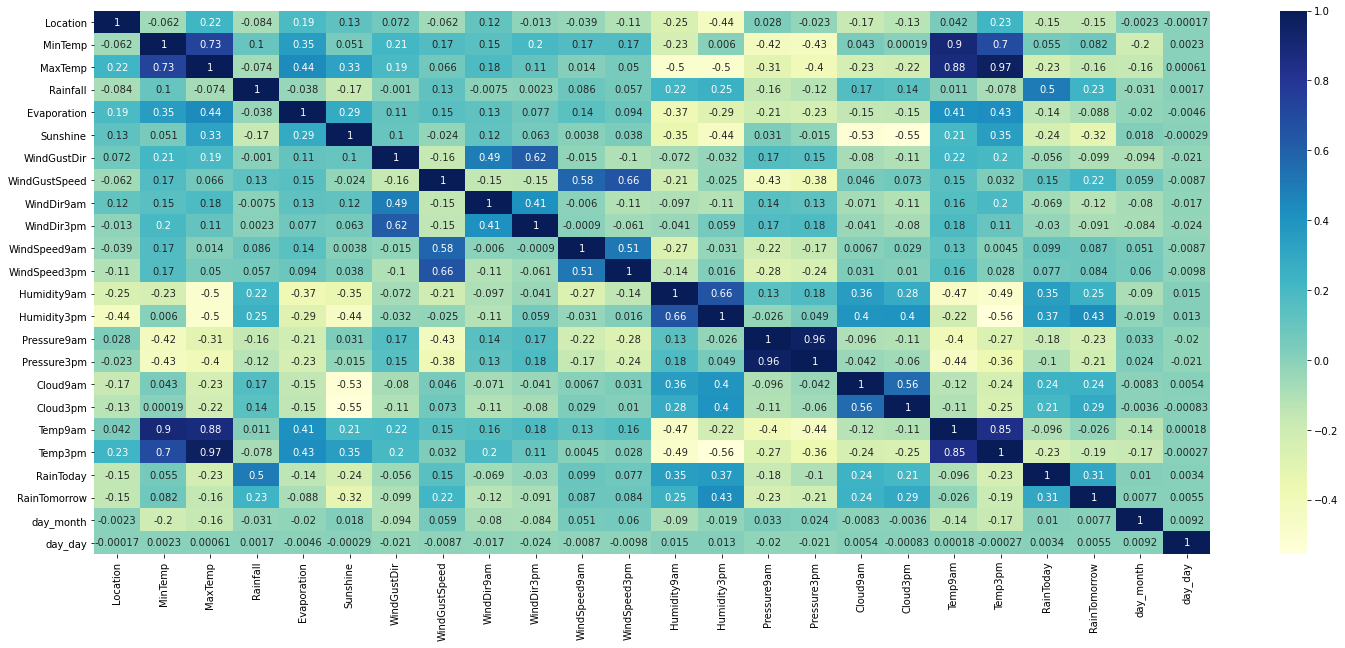

In [26]:
plt.figure(figsize=(25,10))
sns.heatmap(data=data.corr(),annot=True,cmap='YlGnBu')


In [27]:
IQR=data.MinTemp.quantile(0.75)-data.MinTemp.quantile(0.25)
lower_bridge=data.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [28]:
data.loc[data['MinTemp']>=30.85,'MinTemp']=30.85
data.loc[data['MinTemp']<=-6.35,'MinTemp']=-6.35

In [29]:
IQR=data.MaxTemp.quantile(0.75)-data.MaxTemp.quantile(0.25)
lower_bridge=data.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

2.700000000000001 43.5


In [30]:
data.loc[data['MaxTemp']>=43.65,'MaxTemp']=43.65
data.loc[data['MaxTemp']<=9.44,'MaxTemp']=9.44

In [31]:
IQR=data.Rainfall.quantile(0.75)-data.Rainfall.quantile(0.25)
lower_bridge=data.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

-1.5 2.5


In [32]:
data.loc[data['Rainfall']>=2.0,'Rainfall']=2.0
data.loc[data['Rainfall']<=-1.2,'Rainfall']=-1.2

In [33]:
IQR=data.Evaporation.quantile(0.75)-data.Evaporation.quantile(0.25)
lower_bridge=data.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.7976527156163042 7.67057880730616


In [34]:
data.loc[data['Evaporation']>=14.6,'Evaporation']=14.6
data.loc[data['Evaporation']<=-4.6,'Evaporation']=-4.6

In [35]:
IQR=data.WindGustSpeed.quantile(0.75)-data.WindGustSpeed.quantile(0.25)
lower_bridge=data.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [36]:
data.loc[data['WindGustSpeed']>=73.5,'WindGustSpeed']=73.5
data.loc[data['WindGustSpeed']<=5.5,'WindGustSpeed']=8.5

In [37]:
IQR=data.WindSpeed9am.quantile(0.75)-data.WindSpeed9am.quantile(0.25)
lower_bridge=data.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [38]:
data.loc[data['WindSpeed9am']>=37,'WindSpeed9am']=37
data.loc[data['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [39]:
IQR=data.WindSpeed3pm.quantile(0.75)-data.WindSpeed3pm.quantile(0.25)
lower_bridge=data.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [40]:
data.loc[data['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
data.loc[data['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [41]:
IQR=data.Humidity9am.quantile(0.75)-data.Humidity9am.quantile(0.25)
lower_bridge=data.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [42]:
data.loc[data['Humidity9am']>=122,'Humidity9am']=122
data.loc[data['Humidity9am']<=18,'Humidity9am']=18

In [43]:
IQR=data.Pressure9am.quantile(0.75)-data.Pressure9am.quantile(0.25)
lower_bridge=data.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [44]:
data.loc[data['Pressure9am']>=1034.25,'Pressure9am']=1034.25
data.loc[data['Pressure9am']<=1001.05,'Pressure9am']=1001.05


In [45]:
IQR=data.Pressure3pm.quantile(0.75)-data.Pressure3pm.quantile(0.25)
lower_bridge=data.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [46]:
data.loc[data['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
data.loc[data['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [47]:
IQR=data.Temp9am.quantile(0.75)-data.Temp9am.quantile(0.25)
lower_bridge=data.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [48]:
data.loc[data['Temp9am']>=35.3,'Temp9am']=35.3
data.loc[data['Temp9am']<=-1.49,'Temp9am']=-1.49

In [49]:
IQR=data.Temp3pm.quantile(0.75)-data.Temp3pm.quantile(0.25)
lower_bridge=data.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [50]:
data.loc[data['Temp3pm']>=41.9,'Temp3pm']=41.9
data.loc[data['Temp3pm']<=1.95,'Temp3pm']=1.95

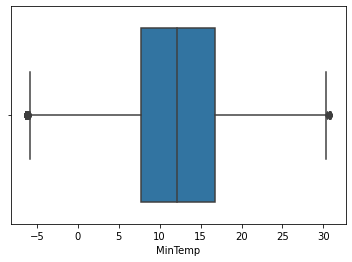

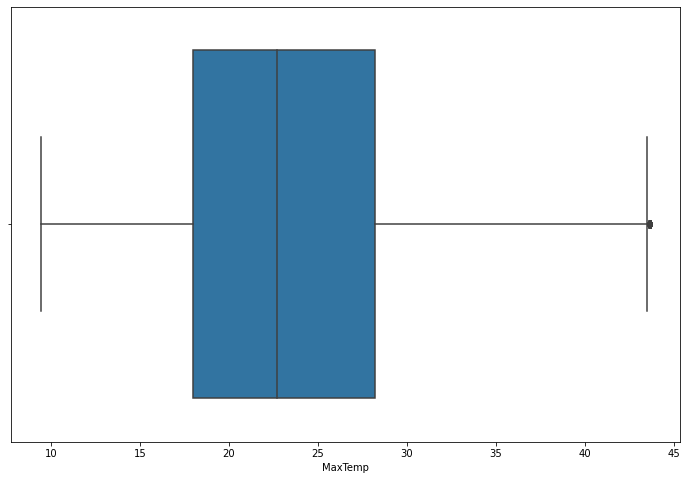

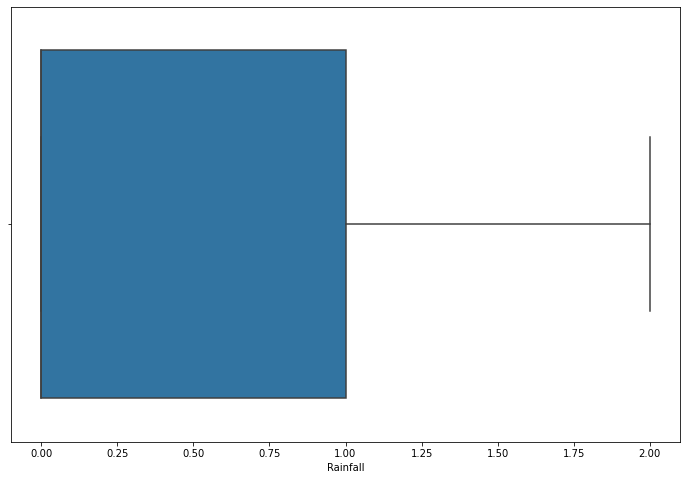

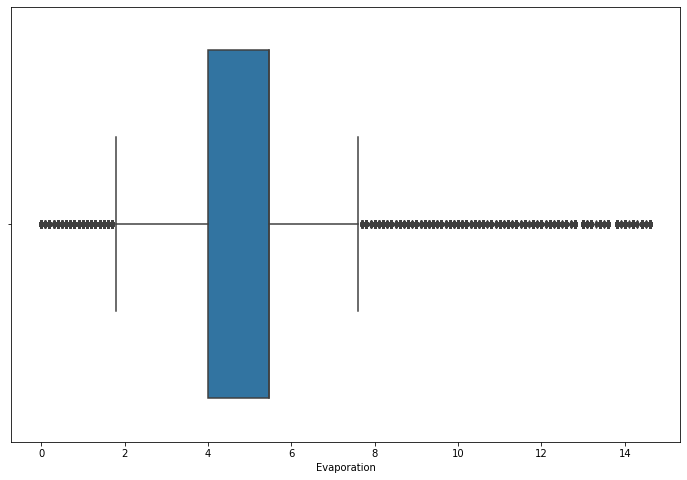

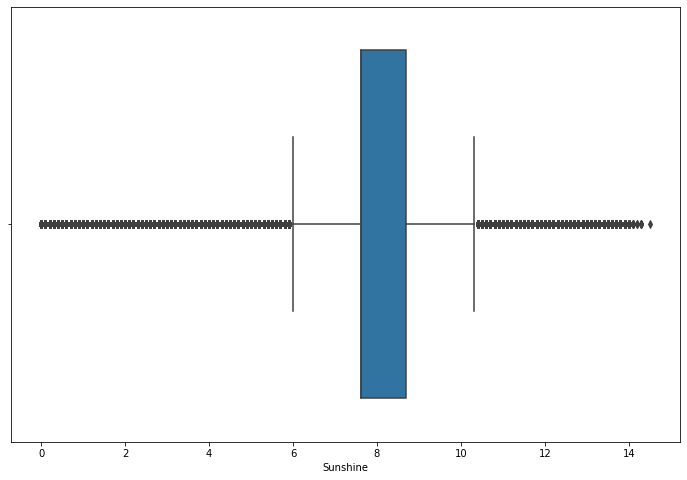

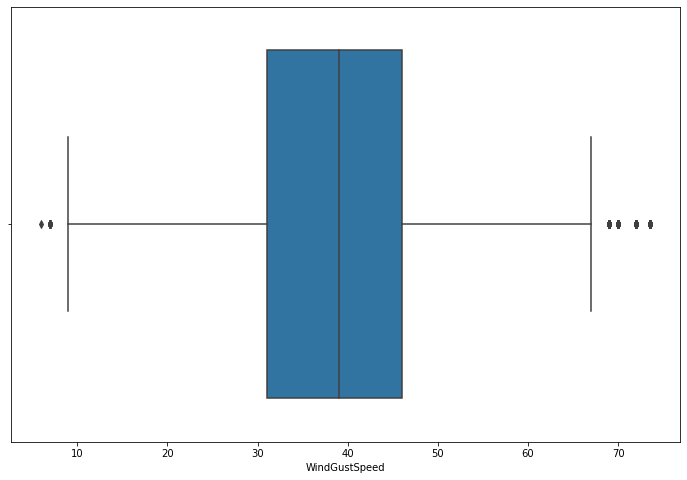

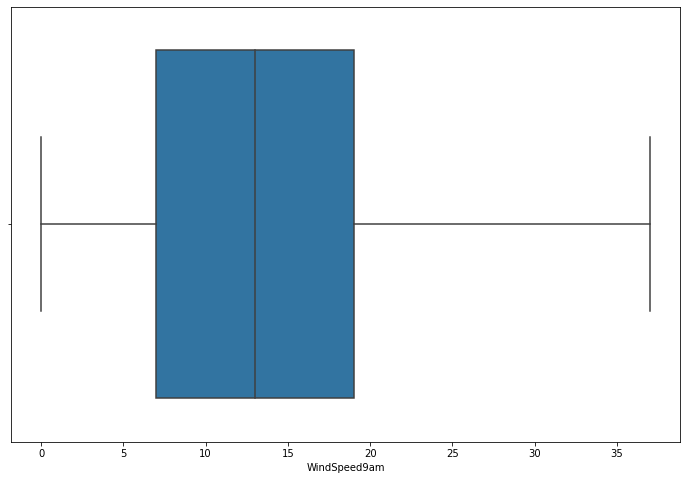

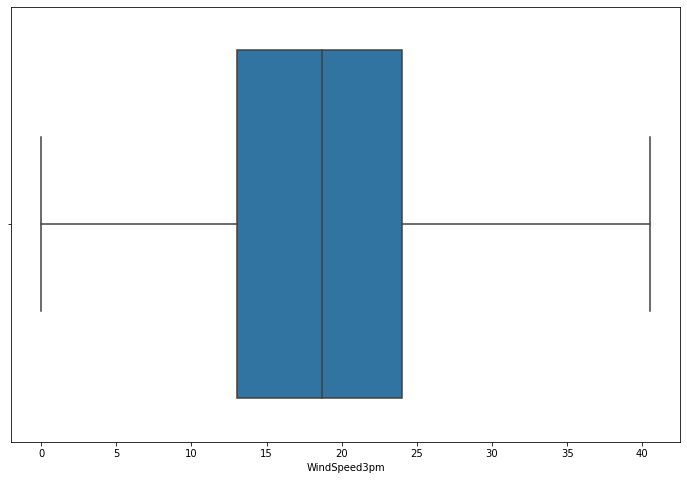

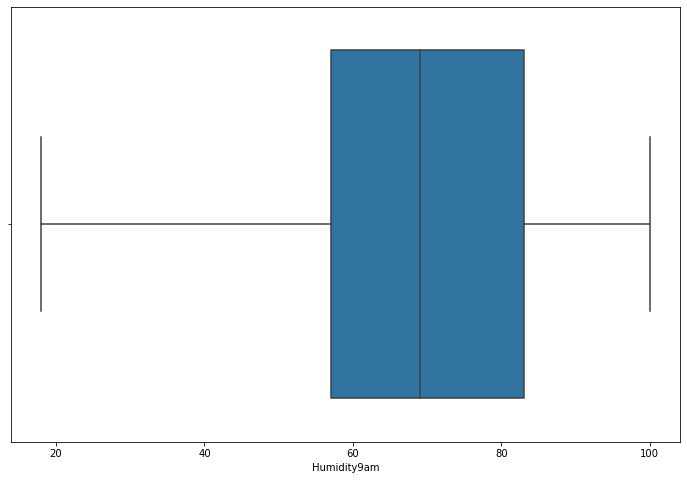

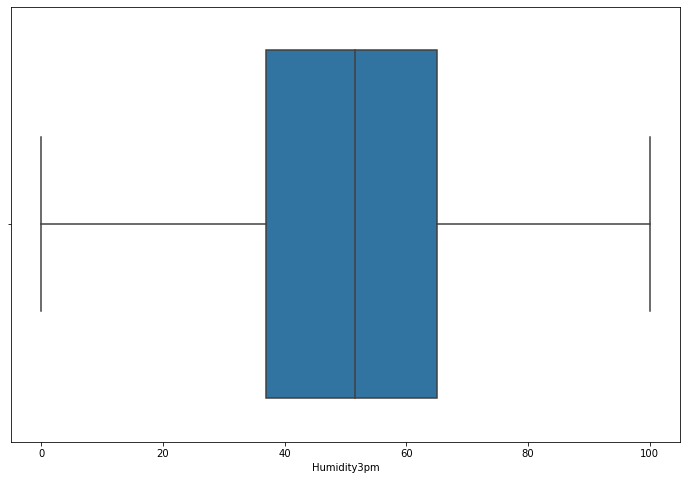

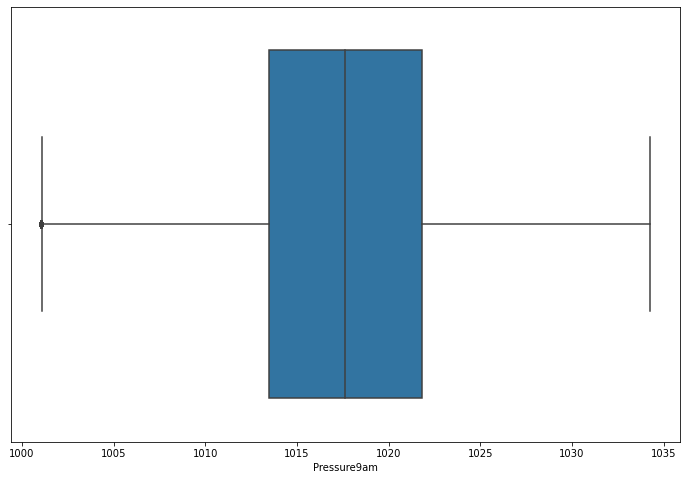

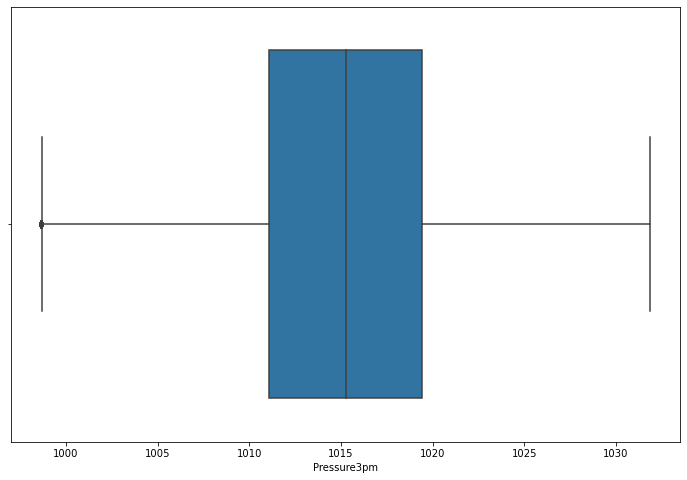

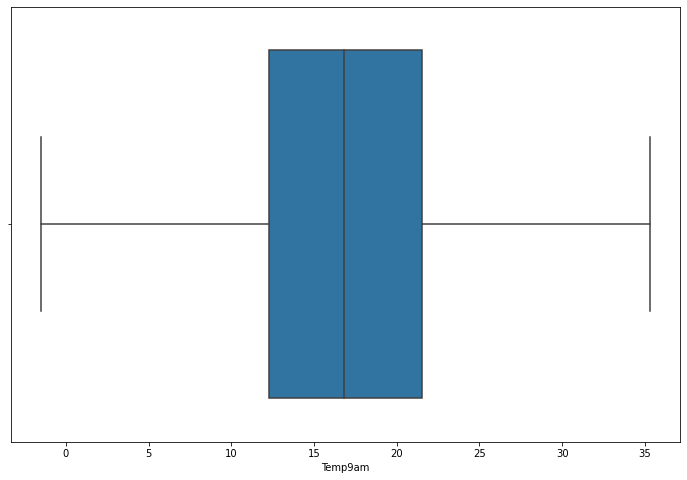

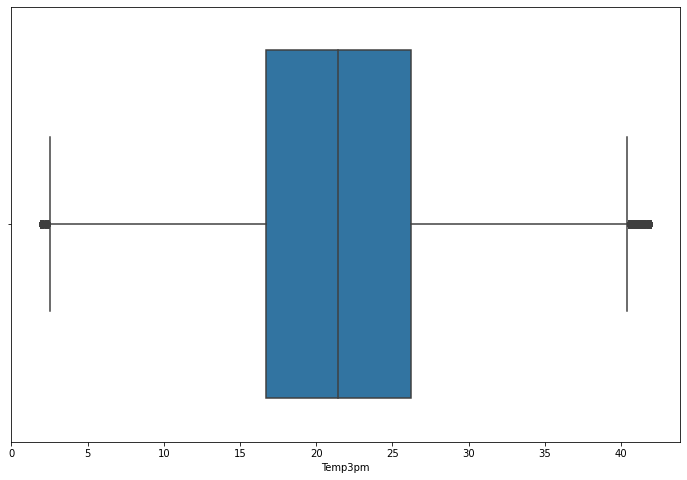

<Figure size 864x576 with 0 Axes>

In [51]:
for feature in continuousnumeric:
    sns.boxplot(data[feature])
    plt.figure(figsize=(12,8))

In [52]:
def qq_plots(data, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


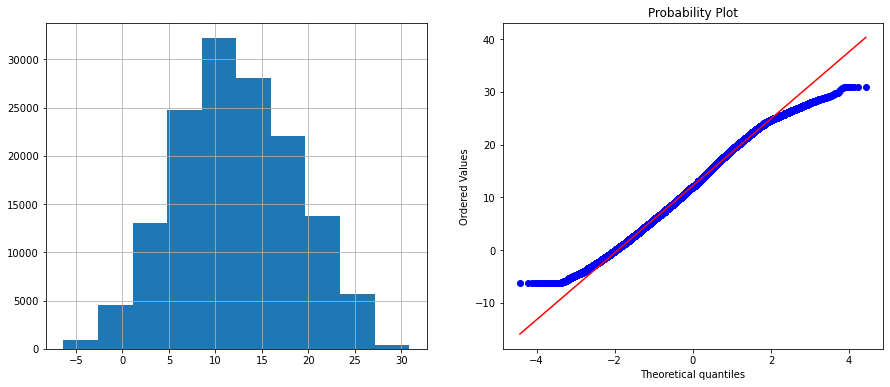

MaxTemp


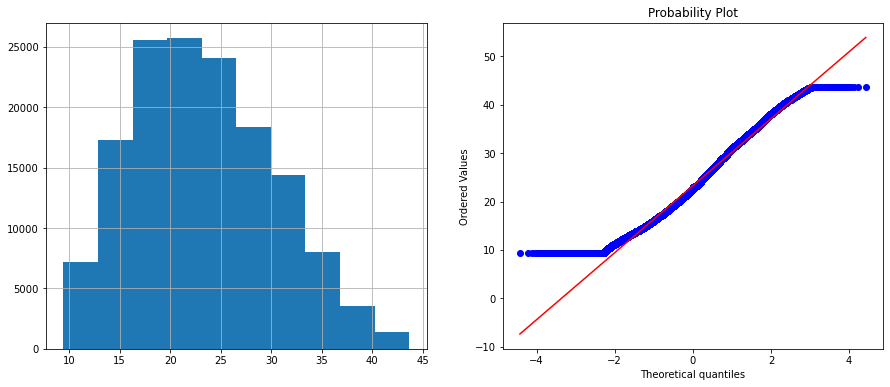

Rainfall


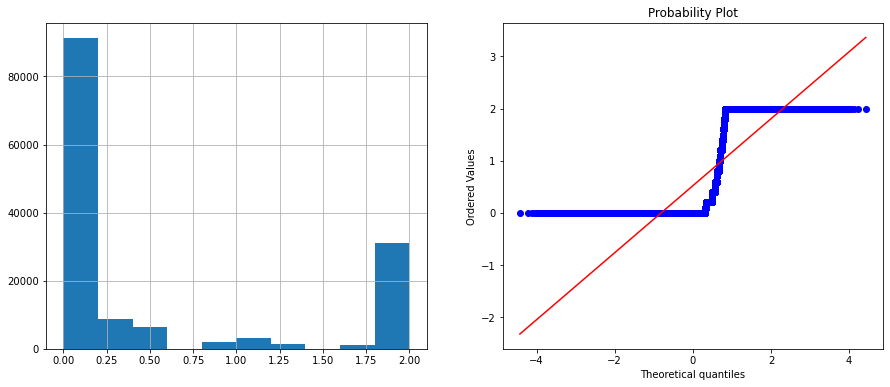

Evaporation


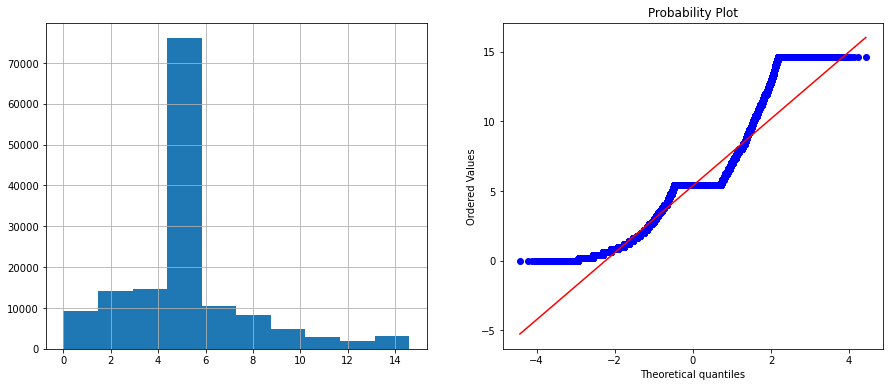

Sunshine


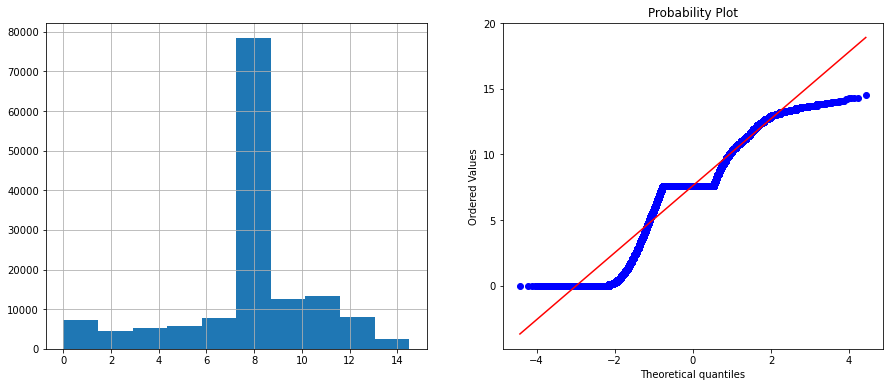

WindGustSpeed


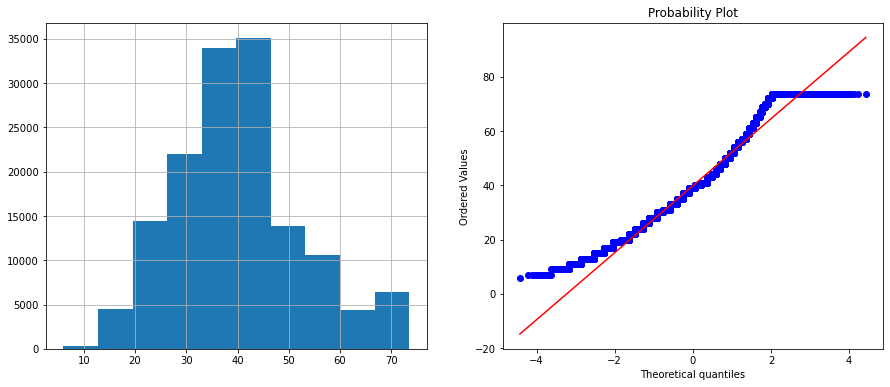

WindSpeed9am


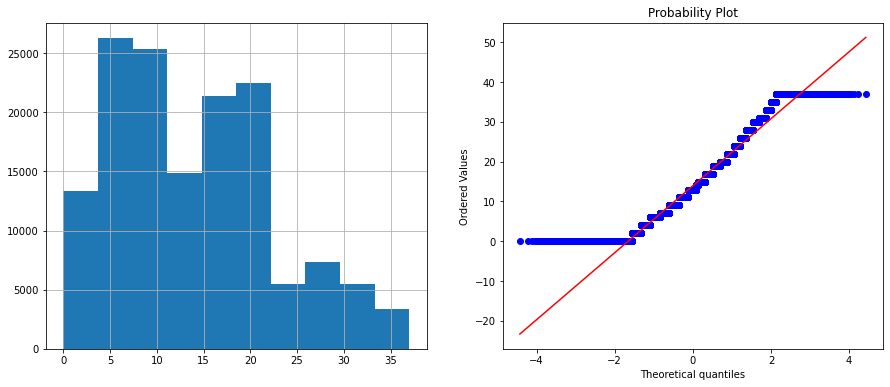

WindSpeed3pm


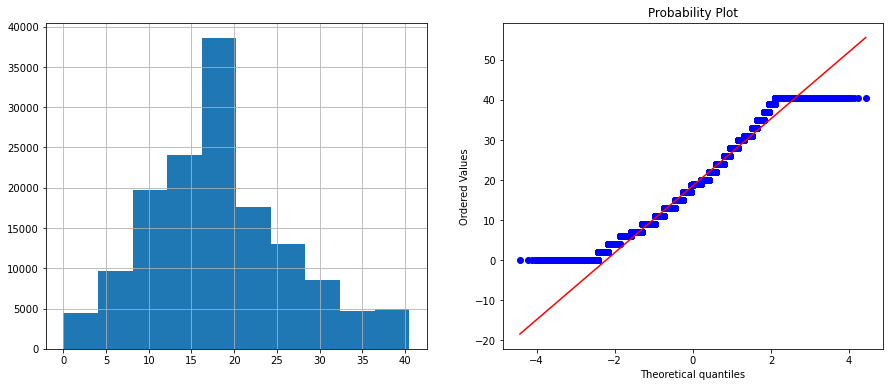

Humidity9am


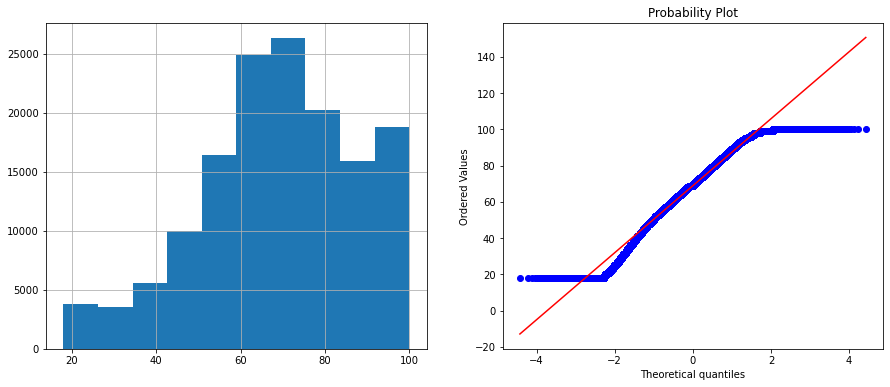

Humidity3pm


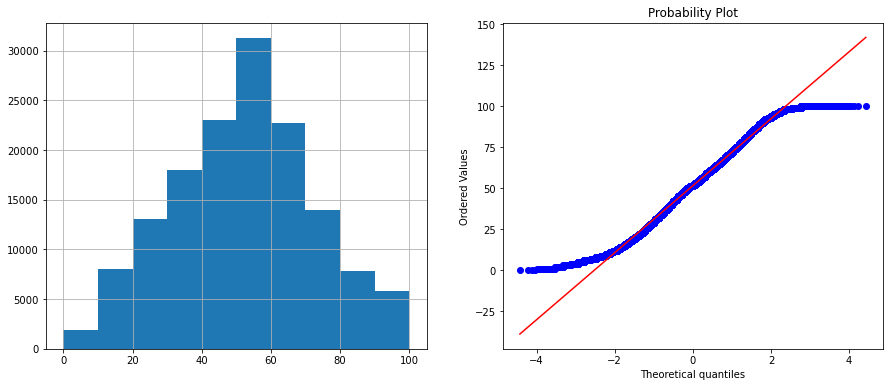

Pressure9am


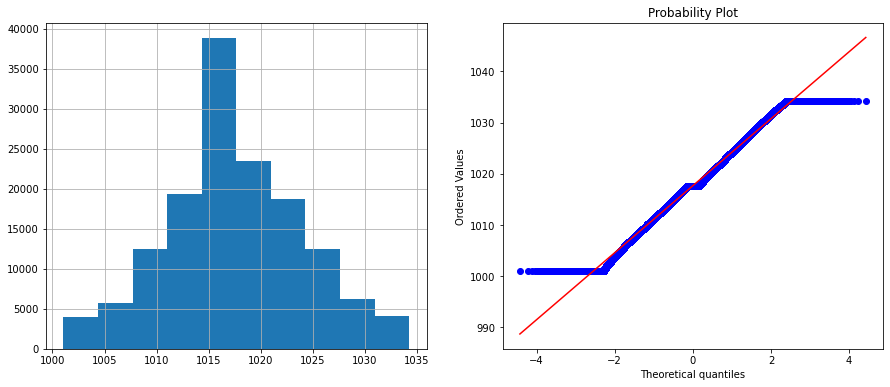

Pressure3pm


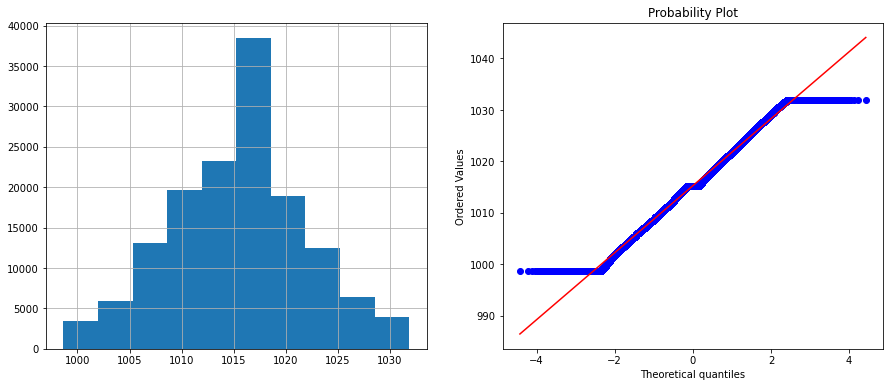

Temp9am


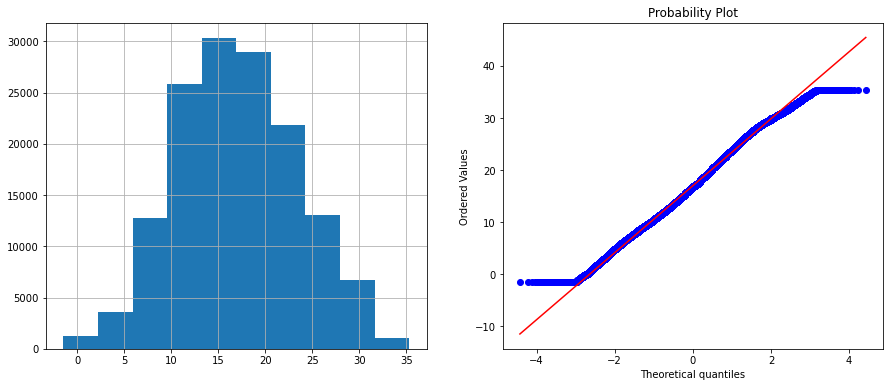

Temp3pm


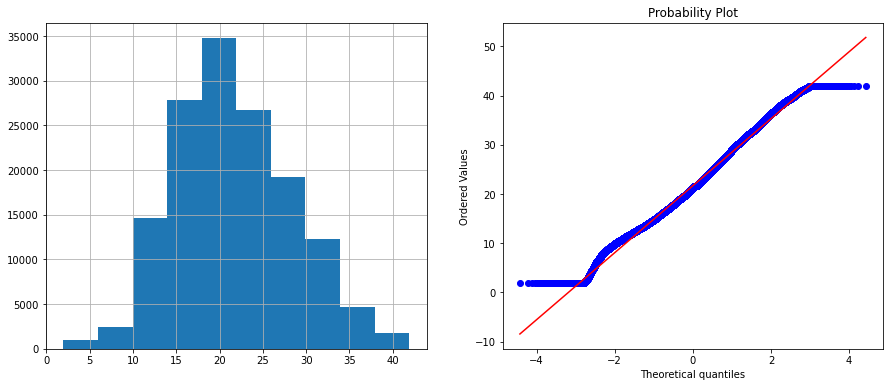

In [53]:
for feature in continuousnumeric:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.show()

In [54]:
x = data.drop(["RainTomorrow", "Date"], axis=1)
y = data["RainTomorrow"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, stratify = y, random_state = 0)

In [56]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [57]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [58]:
tree.score(X_train_res,y_train_res)

0.9999889947835274

In [59]:

cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 298ms	remaining: 9m 54s
1:	total: 360ms	remaining: 5m 59s
2:	total: 420ms	remaining: 4m 39s
3:	total: 482ms	remaining: 4m
4:	total: 563ms	remaining: 3m 44s
5:	total: 632ms	remaining: 3m 29s
6:	total: 717ms	remaining: 3m 24s
7:	total: 815ms	remaining: 3m 22s
8:	total: 887ms	remaining: 3m 16s
9:	total: 967ms	remaining: 3m 12s
10:	total: 1.04s	remaining: 3m 8s
11:	total: 1.1s	remaining: 3m 2s
12:	total: 1.18s	remaining: 2m 59s
13:	total: 1.26s	remaining: 2m 58s
14:	total: 1.33s	remaining: 2m 56s
15:	total: 1.4s	remaining: 2m 53s
16:	total: 1.47s	remaining: 2m 51s
17:	total: 1.53s	remaining: 2m 48s
18:	total: 1.59s	remaining: 2m 46s
19:	total: 1.67s	remaining: 2m 45s
20:	total: 1.73s	remaining: 2m 43s
21:	total: 1.8s	remaining: 2m 42s
22:	total: 1.88s	remaining: 2m 42s
23:	total: 1.96s	remaining: 2m 41s
24:	total: 2.03s	remaining: 2m 40s
25:	total: 2.12s	remaining: 2m 40s
26:	total: 2.18s	remaining: 2m 39s
27:	total: 2.24s	remaining: 2m 37s
28:	total

233:	total: 19s	remaining: 2m 23s
234:	total: 19.1s	remaining: 2m 23s
235:	total: 19.2s	remaining: 2m 23s
236:	total: 19.2s	remaining: 2m 23s
237:	total: 19.3s	remaining: 2m 23s
238:	total: 19.4s	remaining: 2m 23s
239:	total: 19.5s	remaining: 2m 22s
240:	total: 19.6s	remaining: 2m 22s
241:	total: 19.7s	remaining: 2m 23s
242:	total: 19.9s	remaining: 2m 23s
243:	total: 20s	remaining: 2m 23s
244:	total: 20.1s	remaining: 2m 24s
245:	total: 20.2s	remaining: 2m 24s
246:	total: 20.3s	remaining: 2m 24s
247:	total: 20.4s	remaining: 2m 24s
248:	total: 20.5s	remaining: 2m 24s
249:	total: 20.6s	remaining: 2m 23s
250:	total: 20.9s	remaining: 2m 25s
251:	total: 21s	remaining: 2m 25s
252:	total: 21.2s	remaining: 2m 26s
253:	total: 21.3s	remaining: 2m 26s
254:	total: 21.4s	remaining: 2m 26s
255:	total: 21.5s	remaining: 2m 26s
256:	total: 21.6s	remaining: 2m 26s
257:	total: 21.6s	remaining: 2m 26s
258:	total: 21.7s	remaining: 2m 25s
259:	total: 21.8s	remaining: 2m 25s
260:	total: 21.8s	remaining: 2m 25

466:	total: 34.5s	remaining: 1m 53s
467:	total: 34.5s	remaining: 1m 53s
468:	total: 34.6s	remaining: 1m 52s
469:	total: 34.7s	remaining: 1m 52s
470:	total: 34.7s	remaining: 1m 52s
471:	total: 34.8s	remaining: 1m 52s
472:	total: 34.8s	remaining: 1m 52s
473:	total: 34.9s	remaining: 1m 52s
474:	total: 35s	remaining: 1m 52s
475:	total: 35.1s	remaining: 1m 52s
476:	total: 35.1s	remaining: 1m 52s
477:	total: 35.2s	remaining: 1m 52s
478:	total: 35.3s	remaining: 1m 52s
479:	total: 35.3s	remaining: 1m 51s
480:	total: 35.4s	remaining: 1m 51s
481:	total: 35.4s	remaining: 1m 51s
482:	total: 35.5s	remaining: 1m 51s
483:	total: 35.6s	remaining: 1m 51s
484:	total: 35.6s	remaining: 1m 51s
485:	total: 35.7s	remaining: 1m 51s
486:	total: 35.8s	remaining: 1m 51s
487:	total: 35.8s	remaining: 1m 51s
488:	total: 35.9s	remaining: 1m 50s
489:	total: 36s	remaining: 1m 50s
490:	total: 36s	remaining: 1m 50s
491:	total: 36.1s	remaining: 1m 50s
492:	total: 36.2s	remaining: 1m 50s
493:	total: 36.3s	remaining: 1m 50

696:	total: 51.9s	remaining: 1m 37s
697:	total: 52s	remaining: 1m 37s
698:	total: 52.1s	remaining: 1m 36s
699:	total: 52.2s	remaining: 1m 36s
700:	total: 52.2s	remaining: 1m 36s
701:	total: 52.3s	remaining: 1m 36s
702:	total: 52.4s	remaining: 1m 36s
703:	total: 52.4s	remaining: 1m 36s
704:	total: 52.5s	remaining: 1m 36s
705:	total: 52.6s	remaining: 1m 36s
706:	total: 52.6s	remaining: 1m 36s
707:	total: 52.7s	remaining: 1m 36s
708:	total: 52.8s	remaining: 1m 36s
709:	total: 52.9s	remaining: 1m 36s
710:	total: 52.9s	remaining: 1m 35s
711:	total: 53s	remaining: 1m 35s
712:	total: 53.1s	remaining: 1m 35s
713:	total: 53.2s	remaining: 1m 35s
714:	total: 53.2s	remaining: 1m 35s
715:	total: 53.3s	remaining: 1m 35s
716:	total: 53.4s	remaining: 1m 35s
717:	total: 53.4s	remaining: 1m 35s
718:	total: 53.5s	remaining: 1m 35s
719:	total: 53.6s	remaining: 1m 35s
720:	total: 53.6s	remaining: 1m 35s
721:	total: 53.7s	remaining: 1m 35s
722:	total: 53.8s	remaining: 1m 34s
723:	total: 53.8s	remaining: 1m 

928:	total: 1m 8s	remaining: 1m 18s
929:	total: 1m 8s	remaining: 1m 18s
930:	total: 1m 8s	remaining: 1m 18s
931:	total: 1m 8s	remaining: 1m 18s
932:	total: 1m 8s	remaining: 1m 18s
933:	total: 1m 8s	remaining: 1m 18s
934:	total: 1m 8s	remaining: 1m 18s
935:	total: 1m 8s	remaining: 1m 18s
936:	total: 1m 9s	remaining: 1m 18s
937:	total: 1m 9s	remaining: 1m 18s
938:	total: 1m 9s	remaining: 1m 18s
939:	total: 1m 9s	remaining: 1m 18s
940:	total: 1m 9s	remaining: 1m 17s
941:	total: 1m 9s	remaining: 1m 17s
942:	total: 1m 9s	remaining: 1m 17s
943:	total: 1m 9s	remaining: 1m 17s
944:	total: 1m 9s	remaining: 1m 17s
945:	total: 1m 9s	remaining: 1m 17s
946:	total: 1m 9s	remaining: 1m 17s
947:	total: 1m 9s	remaining: 1m 17s
948:	total: 1m 9s	remaining: 1m 17s
949:	total: 1m 9s	remaining: 1m 17s
950:	total: 1m 9s	remaining: 1m 17s
951:	total: 1m 9s	remaining: 1m 16s
952:	total: 1m 9s	remaining: 1m 16s
953:	total: 1m 10s	remaining: 1m 16s
954:	total: 1m 10s	remaining: 1m 16s
955:	total: 1m 10s	remaini

1150:	total: 1m 26s	remaining: 1m 3s
1151:	total: 1m 26s	remaining: 1m 3s
1152:	total: 1m 26s	remaining: 1m 3s
1153:	total: 1m 26s	remaining: 1m 3s
1154:	total: 1m 26s	remaining: 1m 3s
1155:	total: 1m 26s	remaining: 1m 3s
1156:	total: 1m 26s	remaining: 1m 3s
1157:	total: 1m 26s	remaining: 1m 2s
1158:	total: 1m 26s	remaining: 1m 2s
1159:	total: 1m 26s	remaining: 1m 2s
1160:	total: 1m 26s	remaining: 1m 2s
1161:	total: 1m 26s	remaining: 1m 2s
1162:	total: 1m 26s	remaining: 1m 2s
1163:	total: 1m 26s	remaining: 1m 2s
1164:	total: 1m 27s	remaining: 1m 2s
1165:	total: 1m 27s	remaining: 1m 2s
1166:	total: 1m 27s	remaining: 1m 2s
1167:	total: 1m 27s	remaining: 1m 2s
1168:	total: 1m 27s	remaining: 1m 2s
1169:	total: 1m 27s	remaining: 1m 1s
1170:	total: 1m 27s	remaining: 1m 1s
1171:	total: 1m 27s	remaining: 1m 1s
1172:	total: 1m 27s	remaining: 1m 1s
1173:	total: 1m 27s	remaining: 1m 1s
1174:	total: 1m 27s	remaining: 1m 1s
1175:	total: 1m 27s	remaining: 1m 1s
1176:	total: 1m 27s	remaining: 1m 1s
1

1376:	total: 1m 41s	remaining: 45.8s
1377:	total: 1m 41s	remaining: 45.7s
1378:	total: 1m 41s	remaining: 45.6s
1379:	total: 1m 41s	remaining: 45.5s
1380:	total: 1m 41s	remaining: 45.5s
1381:	total: 1m 41s	remaining: 45.4s
1382:	total: 1m 41s	remaining: 45.3s
1383:	total: 1m 41s	remaining: 45.2s
1384:	total: 1m 41s	remaining: 45.2s
1385:	total: 1m 41s	remaining: 45.1s
1386:	total: 1m 41s	remaining: 45s
1387:	total: 1m 41s	remaining: 44.9s
1388:	total: 1m 41s	remaining: 44.8s
1389:	total: 1m 42s	remaining: 44.8s
1390:	total: 1m 42s	remaining: 44.7s
1391:	total: 1m 42s	remaining: 44.6s
1392:	total: 1m 42s	remaining: 44.5s
1393:	total: 1m 42s	remaining: 44.5s
1394:	total: 1m 42s	remaining: 44.4s
1395:	total: 1m 42s	remaining: 44.3s
1396:	total: 1m 42s	remaining: 44.2s
1397:	total: 1m 42s	remaining: 44.2s
1398:	total: 1m 42s	remaining: 44.1s
1399:	total: 1m 42s	remaining: 44s
1400:	total: 1m 42s	remaining: 43.9s
1401:	total: 1m 42s	remaining: 43.8s
1402:	total: 1m 42s	remaining: 43.8s
1403:

1599:	total: 1m 56s	remaining: 29.1s
1600:	total: 1m 56s	remaining: 29s
1601:	total: 1m 56s	remaining: 28.9s
1602:	total: 1m 56s	remaining: 28.9s
1603:	total: 1m 56s	remaining: 28.8s
1604:	total: 1m 56s	remaining: 28.7s
1605:	total: 1m 56s	remaining: 28.6s
1606:	total: 1m 56s	remaining: 28.6s
1607:	total: 1m 56s	remaining: 28.5s
1608:	total: 1m 56s	remaining: 28.4s
1609:	total: 1m 56s	remaining: 28.3s
1610:	total: 1m 57s	remaining: 28.3s
1611:	total: 1m 57s	remaining: 28.2s
1612:	total: 1m 57s	remaining: 28.1s
1613:	total: 1m 57s	remaining: 28s
1614:	total: 1m 57s	remaining: 28s
1615:	total: 1m 57s	remaining: 27.9s
1616:	total: 1m 57s	remaining: 27.8s
1617:	total: 1m 57s	remaining: 27.7s
1618:	total: 1m 57s	remaining: 27.7s
1619:	total: 1m 57s	remaining: 27.6s
1620:	total: 1m 57s	remaining: 27.5s
1621:	total: 1m 57s	remaining: 27.4s
1622:	total: 1m 57s	remaining: 27.4s
1623:	total: 1m 57s	remaining: 27.3s
1624:	total: 1m 57s	remaining: 27.2s
1625:	total: 1m 57s	remaining: 27.1s
1626:	t

1829:	total: 2m 11s	remaining: 12.2s
1830:	total: 2m 11s	remaining: 12.2s
1831:	total: 2m 11s	remaining: 12.1s
1832:	total: 2m 12s	remaining: 12s
1833:	total: 2m 12s	remaining: 12s
1834:	total: 2m 12s	remaining: 11.9s
1835:	total: 2m 12s	remaining: 11.8s
1836:	total: 2m 12s	remaining: 11.7s
1837:	total: 2m 12s	remaining: 11.7s
1838:	total: 2m 12s	remaining: 11.6s
1839:	total: 2m 12s	remaining: 11.5s
1840:	total: 2m 12s	remaining: 11.5s
1841:	total: 2m 12s	remaining: 11.4s
1842:	total: 2m 12s	remaining: 11.3s
1843:	total: 2m 13s	remaining: 11.3s
1844:	total: 2m 13s	remaining: 11.2s
1845:	total: 2m 13s	remaining: 11.1s
1846:	total: 2m 13s	remaining: 11s
1847:	total: 2m 13s	remaining: 11s
1848:	total: 2m 13s	remaining: 10.9s
1849:	total: 2m 13s	remaining: 10.8s
1850:	total: 2m 13s	remaining: 10.8s
1851:	total: 2m 13s	remaining: 10.7s
1852:	total: 2m 13s	remaining: 10.6s
1853:	total: 2m 13s	remaining: 10.5s
1854:	total: 2m 13s	remaining: 10.5s
1855:	total: 2m 13s	remaining: 10.4s
1856:	tot

In [61]:

y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21454  1263]
 [ 2690  3685]]
0.8641207204729823
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     22717
           1       0.74      0.58      0.65      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



0.7612210428917793

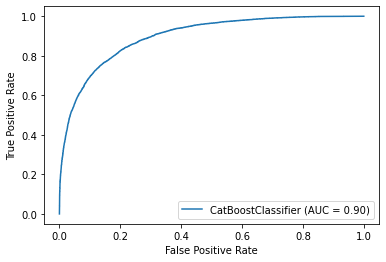

In [62]:

metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)